# Default MNIST code

In [1]:
import tensorflow as tf

In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2951 - accuracy: 0.9133
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1428 - accuracy: 0.9578
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1066 - accuracy: 0.9672
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0883 - accuracy: 0.9725
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0729 - accuracy: 0.9773
313/313 - 0s - loss: 0.0720 - accuracy: 0.9768 - 319ms/epoch - 1ms/step


[0.07195433229207993, 0.9768000245094299]

# Fashion MNIST

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5266 - accuracy: 0.8152
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3996 - accuracy: 0.8539
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3635 - accuracy: 0.8663
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3417 - accuracy: 0.8737
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3284 - accuracy: 0.8798
313/313 - 0s - loss: 0.3593 - accuracy: 0.8697 - 356ms/epoch - 1ms/step


[0.35928475856781006, 0.869700014591217]

# Not changed model + only data preprocessing

In [3]:
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

In [88]:
import scipy.ndimage as ndimage
from scipy import interpolate
import cv2

IMG_SIZE = 28

def regular(image, label):
    img = np.array(image)
    img = np.repeat((img/255.0).astype("float32"), 1, -1)
    return img, label

def edge_detection(image, label):
    img =image
    laplacian = cv2.Laplacian(img, cv2.CV_8U)
    laplacian, _ = regular(laplacian , label)
    
    edges = cv2.Canny(img, 100, 150)
    edges, _ = regular(edges , label)
    return (laplacian, edges), label

def reverse(image, label): 
    x, _ = regular(image, "")
    return x[:,::-1], label

def histogram_equal(image, label):
    img = cv2.equalizeHist(image)
    return img, label

def contrast(image, label):
    alpha = 1.0
    img = np.clip((1+alpha)*image - 128*alpha, 0, 255).astype(np.uint8)
    return img, label

def shift(image, label):
    img, _ = regular(image, "")
    h, w = img.shape[:2]
    weightx = 2.8
    weighty = 2.8
    if np.random.rand() < 2.5:
        weightx *= -1
    elif np.random.rand() < 5.0:
        weighty *= -1
    elif np.random.rand() < 7.5:
        weightx *= -1
        weighty *= -1
    M = np.float32([[1, 0, weightx], [0, 1, weighty]])
    img2 = cv2.warpAffine(img, M, (w, h))
    return img2, label

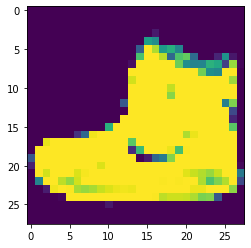

In [105]:
plt.imshow(contrast(train_images[0], "")[0])

In [183]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [184]:
x_train, y_train = list(), list()

#1 기본 정규화 코드
for i in range(len(train_images)):
    tmpx, tmpy = regular(train_images[i], train_labels[i])
    x_train.append(tmpx)
    y_train.append(tmpy)
    
#2 data augmentation : flip - 2와 결과 비슷
for i in range(len(train_images)):
    tmpx, tmpy = reverse(train_images[i], train_labels[i])
    x_train.append(tmpx)
    y_train.append(tmpy)

    
#3 feature engineering : 0.889로 살짝 더 결과가 좋음 
for i in range(len(train_images)):
    tmpx, tmpy = edge_detection(train_images[i], train_labels[i])
    x_train.append(tmpx[0])
    y_train.append(tmpy)
    x_train.append(tmpx[1])
    y_train.append(tmpy)
    

    
#4 feature engineering : 0.72로 결과 안좋다. 폐기
"""for i in range(len(train_images)):
    tmpx, tmpy = histogram_equal(train_images[i], train_labels[i])
    x_train.append(tmpx)
    y_train.append(tmpy) 

for i in range(len(train_images)):
    tmpx, tmpy = reverse(train_images[i], train_labels[i])
    tmpx, _ = histogram_equal(train_images[i], train_labels[i])
    x_train.append(tmpx)
    y_train.append(tmpy)"""  
   
#5 feature engineering : 0.71로 결과 안좋다. 폐기
"""for i in range(len(train_images)):
    tmpx, tmpy = contrast(train_images[i], train_labels[i])
    x_train.append(tmpx)
    y_train.append(tmpy) 

for i in range(len(train_images)):
    tmpx, tmpy = reverse(train_images[i], train_labels[i])
    tmpx, _ = contrast(train_images[i], train_labels[i])
    x_train.append(tmpx)
    y_train.append(tmpy)  """
    
#6 data augmentation : shift 0.888 결과좋다!

"""for i in range(len(train_images)):
    tmpx, tmpy = shift(train_images[i], train_labels[i])
    x_train.append(tmpx)
    y_train.append(tmpy)"""
    

 


'for i in range(len(train_images)):\n    tmpx, tmpy = shift(train_images[i], train_labels[i])\n    x_train.append(tmpx)\n    y_train.append(tmpy)'

In [185]:
x_train, y_train = tf.convert_to_tensor(x_train),tf.convert_to_tensor(y_train)

In [186]:
test_images = test_images/255.0

In [187]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(test_images,  test_labels, verbose=2)

Epoch 1/5
18750/18750 [==============================] - 34s 2ms/step - loss: 0.4279 - accuracy: 0.8454
Epoch 2/5
18750/18750 [==============================] - 34s 2ms/step - loss: 0.3417 - accuracy: 0.8758
Epoch 3/5
18750/18750 [==============================] - 33s 2ms/step - loss: 0.3143 - accuracy: 0.8851
Epoch 4/5
18750/18750 [==============================] - 34s 2ms/step - loss: 0.2972 - accuracy: 0.8917
Epoch 5/5
18750/18750 [==============================] - 35s 2ms/step - loss: 0.2853 - accuracy: 0.8955
313/313 - 0s - loss: 0.3376 - accuracy: 0.8861 - 381ms/epoch - 1ms/step


[0.33764564990997314, 0.8860999941825867]

# model change 

In [238]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization

In [239]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [240]:
x_train.shape

(60000, 28, 28)

In [244]:
model = tf.keras.models.Sequential([
    Conv2D(32, (3, 3), strides=1, padding='same', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2), padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), strides=1, padding='same', activation='relu'),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(128, (3, 3), strides=1, padding='same', activation='relu'),
    Flatten(),
    Dense(128, 'relu'),
    Dense(10, 'sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 44s 23ms/step - loss: 0.3415 - accuracy: 0.8758
Epoch 2/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.2336 - accuracy: 0.9130
Epoch 3/5
1875/1875 [==============================] - 42s 23ms/step - loss: 0.1945 - accuracy: 0.9273
Epoch 4/5
1875/1875 [==============================] - 42s 23ms/step - loss: 0.1646 - accuracy: 0.9378
Epoch 5/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.1393 - accuracy: 0.9476
313/313 - 2s - loss: 0.3064 - accuracy: 0.9012 - 2s/epoch - 7ms/step


[0.3063916563987732, 0.901199996471405]

# final

In [245]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
x_train, y_train = list(), list()

#1 기본 정규화 코드
for i in range(len(train_images)):
    tmpx, tmpy = regular(train_images[i], train_labels[i])
    x_train.append(tmpx)
    y_train.append(tmpy)
    
#2 data augmentation : flip - 2와 결과 비슷
for i in range(len(train_images)):
    tmpx, tmpy = reverse(train_images[i], train_labels[i])
    x_train.append(tmpx)
    y_train.append(tmpy)

    
#3 feature engineering : 0.889로 살짝 더 결과가 좋음 
for i in range(len(train_images)):
    tmpx, tmpy = edge_detection(train_images[i], train_labels[i])
    x_train.append(tmpx[0])
    y_train.append(tmpy)
    x_train.append(tmpx[1])
    y_train.append(tmpy)
    
x_train, y_train = tf.convert_to_tensor(x_train),tf.convert_to_tensor(y_train)
test_images = test_images/255.0

In [246]:
model = tf.keras.models.Sequential([
    Conv2D(32, (3, 3), strides=1, padding='same', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2), padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), strides=1, padding='same', activation='relu'),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(128, (3, 3), strides=1, padding='same', activation='relu'),
    Flatten(),
    Dense(128, 'relu'),
    Dense(10, 'sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/5
7500/7500 [==============================] - 174s 23ms/step - loss: 0.3283 - accuracy: 0.8780
Epoch 2/5
7500/7500 [==============================] - 167s 22ms/step - loss: 0.2336 - accuracy: 0.9130
Epoch 3/5
7500/7500 [==============================] - 168s 22ms/step - loss: 0.1976 - accuracy: 0.9257
Epoch 4/5
7500/7500 [==============================] - 171s 23ms/step - loss: 0.1710 - accuracy: 0.9350
Epoch 5/5
7500/7500 [==============================] - 167s 22ms/step - loss: 0.1501 - accuracy: 0.9427
313/313 - 2s - loss: 0.2506 - accuracy: 0.9197 - 2s/epoch - 7ms/step


[0.25058045983314514, 0.919700026512146]